<a href="https://colab.research.google.com/github/Rojika1/AI-Lab-3-KNN-Implementation-Rojika-Gauro/blob/main/KNN_Arbitrary_point(3D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Label for test point [24, 25000, 2] is: B


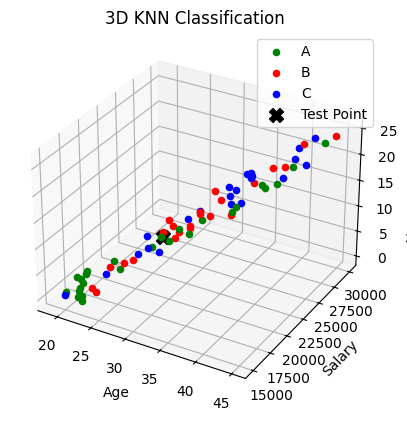

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter


df = pd.read_csv("/content/knndataset.csv")


training_data = df[['Age', 'Salary', 'YearsExperience']].values.tolist()
training_labels = df['Label'].tolist()


test_point = [24, 25000, 2]


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))


def generate_k(n_samples):
    k = int(np.sqrt(n_samples))
    if k % 2 == 0:
        k += 1
    return max(1, k)

def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]


k = generate_k(len(training_data))
prediction = knn_predict(training_data, training_labels, test_point, k)
print(f"Predicted Label for test point {test_point} is: {prediction}")


unique_labels = list(set(training_labels))
colors = ['red', 'green', 'blue', 'orange', 'purple']
label_colors = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(len(training_data)):
    x, y, z = training_data[i]
    label = training_labels[i]
    ax.scatter(x, y, z, c=label_colors[label], label=label if label not in training_labels[:i] else "")


ax.scatter(test_point[0], test_point[1], test_point[2],
           c='black', marker='X', s=100, label='Test Point')


ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Years Experience')
plt.title('3D KNN Classification')
plt.legend()
plt.show()